<a href="https://colab.research.google.com/github/sungreong/TIL/blob/master/Tensorflow2_0_Basic_Linear_Regression_2D_3D_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install tensorflow==2.0.0-alpha0

<div>
    <center><font size = 10> 3D 자료</font></center>
    </div>



[1 tensorflow linear regression](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/examples/2_BasicModels/linear_regression.py) , 

[2 tensorflow kears 예시](https://www.tensorflow.org/tutorials/keras/basic_regression) ,

[3 tensorflow weight 뽑기 ](https://stackoverflow.com/questions/48953145/keras-get-weights-takes-longer-to-compute-each-time-when-looping) , 

[4 jupyter notebook 에서 3D Animation 하기](https://pythonmatplotlibtips.blogspot.com/2018/11/animation-3d-wireframe-plot-funcanimation.html)

[5 jupyter notebook 에서 3D Animation2](https://pythonmatplotlibtips.blogspot.com/2018/01/rotate-azimuth-angle-animation-3d-python-matplotlib-pyplot.html)

[6 jupyter 3D 예시](https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter)

[7 3D , 2D Animation 시각화](http://zulko.github.io/blog/2014/11/29/data-animations-with-python-and-moviepy/)

[8 3D 제일 좋음 참고](http://saitcelebi.com/tut/output/part1.html)

[9 2D Contour Animation](https://jed-ai.github.io/py1_gd_animation/)

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [0]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
import matplotlib.animation as animation

f = lambda x: x**2 + 6*x + 5
x = 6.0
LEARNING_RATE = 0.1

steps = []
for i in range(21):
    steps.append([x, f(x)])
    x = x - LEARNING_RATE * (2 * x + 6)

steps = np.array(steps)

def animate(i):
    scatter_points.set_offsets(steps[0:i+1,:])
    text_box.set_text('Iteration: {}'.format(i))
    return scatter_points, text_box

fig = plt.figure()
xs = np.arange(-10, 10, 0.001)
ax = fig.add_subplot(111)
ax.set_title('Gradient descent updates', size=18)
ax.set_xlim([-10.0, 10.0])
ax.set_xlabel('$x$', size=20)
ax.set_ylabel('$f(x)$', size=20)
ax.grid()
ax.plot(xs, f(xs), label=r'$f(x)= x^2 + 6x + 5$')
ax.legend(loc='upper left', fontsize=17)

scatter_points = ax.scatter([], [], c='red', s=50)
text_box = ax.text(4, 170, '', size = 16)

anim = animation.FuncAnimation(fig, animate, 20, blit=True, interval=500)
#anim.save('animation.mp4', writer='avconv', fps=2, codec="libx264")
plt.rcParams['animation.html'] = 'html5'
plt.close()
anim


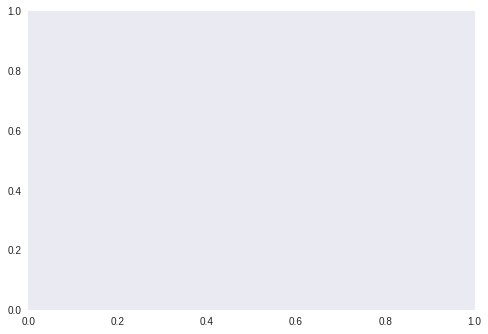

In [0]:
f = lambda x,y: x**2 + y**2
NX = 100
NY = 100

x1 = -3.2
x2 = -3.2
LEARNING_RATE = 0.1

steps = []
for i in range(21):
    steps.append([x1, x2])
    x1 = x1 - LEARNING_RATE * (2 * x1)
    x2 = x2 - LEARNING_RATE * (2 * x2)

steps = np.array(steps)

xs = np.linspace(-4, 4, NX)
ys = np.linspace(-4, 4, NY)
xv, yv = np.meshgrid(xs, ys)

zv = f(yv.flatten(), xv.flatten())

plt.grid()
fig = plt.figure()
fig.suptitle('Some arbitrary function: $f(x_1,x_2) = x_1^2 + x_2^2$', fontsize=15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('$x_1$', size=16)
ax.set_ylabel('$x_2$', size=16)
ax.plot_surface(xv, yv, zv.reshape(NX, NY), rstride=4, cstride=4, alpha=0.25)
ax.view_init(55, 35)


def animate(i):
    graph.set_offsets(steps[i,:])
    graph.set_3d_properties([f(*steps[i,:])], zdir='z')
    text_box.set_text('Iteration: {}'.format(i))
    return graph, text_box

graph = ax.scatter([], [], [], s=50, c='red')
lines, = ax.plot([], [], [], c='red')

text_box = ax.text(-4, 3, 500.0, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, 20, interval=50, blit=True)

plt.rcParams['animation.html'] = 'html5'
plt.close()
anim

In [0]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

X = np.array([[-0.1, 1.4],
              [-0.5,-0.1],
              [ 1.3, 0.9],
              [-0.6, 0.4],
              [-1.5, 0.4],
              [ 0.2, 0.2],
              [-0.3,-0.4],
              [ 0.7,-0.8],
              [ 1.1,-1.5],
              [-1.0, 0.9],
              [-0.5,-1.5],
              [-1.3,-0.4],
              [-1.4,-1.2],
              [-0.9,-1.1],
              [ 0.4,-1.3],
              [-0.4, 0.6],
              [ 0.3,-0.5]])

y = np.array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1])
colormap = np.array(['r', 'b'])

LEARNING_RATE = 8.0
NUM_EPOCHS = 20


sigmoid = lambda x: 1/(1+np.exp(-x))


def get_loss(y, a):
      return -1 * (y * np.log(a) +
                   (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
       return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                    (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

# some nice initial value, so that the plot looks nice.
w = np.array([-4.0, 29.0])
b = 0.0

for i in range(NUM_EPOCHS):
    dw = np.zeros(w.shape)
    db = 0.0
    loss = 0.0

    for j in range(X.shape[0]):
        x_j = X[j,:]
        y_j = y[j]

        z_j = w.dot(x_j) + b
        a_j = sigmoid(z_j)

        loss_j = get_loss_numerically_stable(y_j, z_j)

        dw_j = x_j * (a_j-y_j)
        db_j = a_j - y_j

        dw += dw_j
        db += db_j
        loss += loss_j

      # because we have 17 samples
    dw = (1.0/17) * dw
    db = (1.0/17) * db
    loss = (1.0/17) * loss

    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db

    w_cache.append(w.copy())
    b_cache.append(b)
    l_cache.append(loss)

NX = 100
NY = 100

def get_average_loss(X, w, b):
  total_loss = 0.0
  for i in range(X.shape[0]):
    x_i = X[i,:]
    z = w.dot(x_i) + b
    total_loss += get_loss_numerically_stable(y[i], z)
  return total_loss / X.shape[0]

xs = np.linspace(-30, 30, NX)
ys = np.linspace(-30, 30, NY)
xv, yv = np.meshgrid(xs, ys)

w_fake = np.stack((xv.flatten(), yv.flatten()), axis=1)

losses = []
for i in range(w_fake.shape[0]):
  losses.append( get_average_loss(X, w_fake[i,:], b_cache[-1]) )

losses = np.array(losses)
min_loss = np.min(losses)

In [0]:
NX = 100
NY = 100

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d([-40, 40.0])
ax.set_ylim3d([-40, 40.0])
ax.set_xlabel('$w_1$', size=20)
ax.set_ylabel('$w_2$', size=20)

ax.set_title('Gradient descent updates', fontsize=17)
ax.plot_surface(xv, yv, losses.reshape(NX, NY), rstride=4, cstride=4, alpha=0.25)

def animate(i):
    graph.set_offsets([w_cache[i][0], w_cache[i][1]])
    graph.set_3d_properties([l_cache[i]], zdir='z')

    line_data[0].append(w_cache[i].flatten()[0])
    line_data[1].append(w_cache[i].flatten()[1])
    line_data[2].append(l_cache[i])

    lines.set_data(line_data[0], line_data[1])
    lines.set_3d_properties(line_data[2])

    text_box.set_text('Iteration: {}'.format(i))

    return graph, lines, text_box

line_data = [[], [], []]
graph = ax.scatter([], [], [], s=100, c='red')
lines, = ax.plot([], [], [], c='red' , linewidth = 2 , linestyle = "dashed" , marker = "v")

text_box = ax.text(20.0, 20.0, 500.0, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(w_cache), interval=200, blit=True)
# anim.save('animation.mp4', writer='avconv', fps=2, codec="libx264")

plt.rcParams['animation.html'] = 'html5'
plt.close()
anim


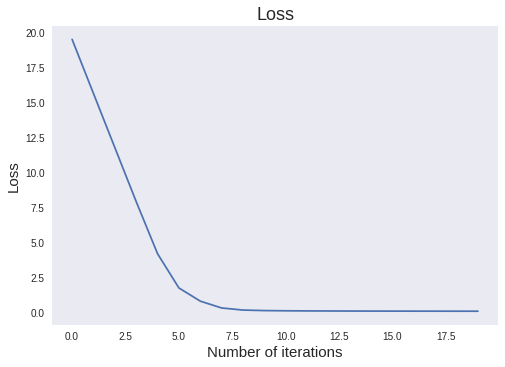

In [0]:
LEARNING_RATE = 8.0
NUM_EPOCHS = 20

sigmoid = lambda x: 1/(1+np.exp(-x))

def get_loss(y, a):
  return -1 * (y * np.log(a) +
               (1-y) * np.log(1-a))

def get_loss_numerically_stable(y, z):
   return -1 * (y * -1 * np.log(1 + np.exp(-z)) +
                (1-y) * (-z - np.log(1 + np.exp(-z))))

w_cache = []
b_cache = []
l_cache = []

# some nice initial value, so that the plot looks nice.
w = np.array([-4.0, 29.0])
b = 0.0

for i in range(NUM_EPOCHS):
  dw = np.zeros(w.shape)
  db = 0.0
  loss = 0.0

  for j in range(X.shape[0]):
    x_j = X[j,:]
    y_j = y[j]

    z_j = w.dot(x_j) + b
    a_j = sigmoid(z_j)

    loss_j = get_loss_numerically_stable(y_j, z_j)

    dw_j = x_j * (a_j-y_j)
    db_j = a_j - y_j

    dw += dw_j
    db += db_j
    loss += loss_j

  # because we have 17 samples
  dw = (1.0/17) * dw
  db = (1.0/17) * db
  loss = (1.0/17) * loss

  w -= LEARNING_RATE * dw
  b -= LEARNING_RATE * db

  w_cache.append(w.copy())
  b_cache.append(b)
  l_cache.append(loss)

plt.grid()
plt.title('Loss', size=18)
plt.xlabel('Number of iterations', size=15)
plt.ylabel('Loss', size=15)
plt.plot(l_cache)
plt.show()

IndexError: ignored

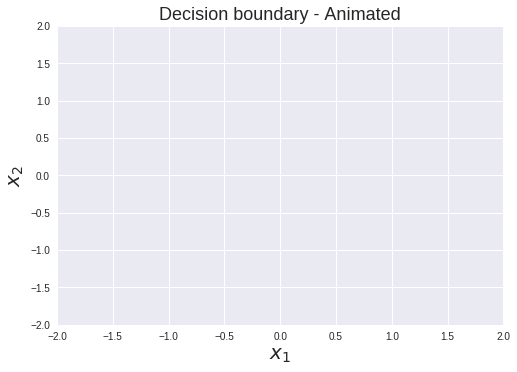

In [0]:
import matplotlib.animation as animation

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_xlabel('$x_1$', size=20)
ax.set_ylabel('$x_2$', size=20)

ax.set_title('Decision boundary - Animated', size = 18)

def animate(i):
    xs = np.array([-2.0, 2.0])
    ys = (-w_cache[i][0] * xs - b)/w_cache[i][1]
    lines.set_data(xs, ys)

    text_box.set_text('Iteration: {}'.format(i))

    return lines, text_box

lines, = ax.plot([], [], c='black')
ax.scatter(X[:,0], X[:,1], s=50, c=colormap[y])
text_box = ax.text(1.1, 1.6, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(w_cache), blit=True, interval=500)

plt.rcParams['animation.html'] = 'html5'
plt.close()
anim



In [0]:
print(tf.__version__)

2.0.0-alpha0


In [0]:
n = 100
x = tf.random.uniform(shape = (n,1),minval = -1 , maxval = 1)

In [0]:
b_0 , b_1 = 3 , 5 
y = b_0 + b_1 * x
y_2 = y + tf.random.normal((n,1) , mean = 0.0 , stddev = 1.0)

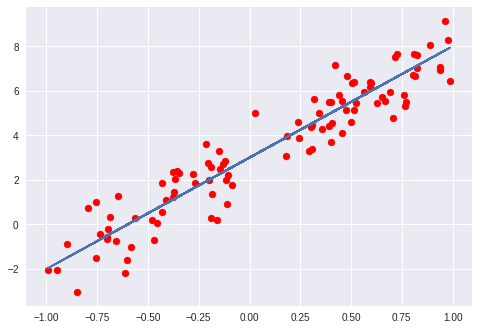

In [0]:
plt.scatter(x,y_2, c = "red")
plt.plot(x,y)
plt.show()

In [0]:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(1 , activation = tf.nn.relu , use_bias = True , input_shape = [1] , 
                          kernel_initializer = tf.random_normal_initializer(mean = 20, stddev=5.0) ,
                          bias_initializer = tf.random_normal_initializer(mean = 20, stddev=5.0) ),
    #tf.keras.layers.Dense(1)
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer = tf.keras.optimizers.SGD(0.001)
model.compile(loss= "mean_squared_error", 
              optimizer = optimizer ,
              metrics = ["mean_squared_error"]
             )

초기 가중치값 확인.

In [0]:
print("Beta1 : {} , Beat0 : {}".format(model.layers[0].get_weights()[0][0][0] , model.layers[0].get_weights()[1][0])  )

Beta1 : 23.35592269897461 , Beat0 : 23.79859733581543


In [0]:
weight , beta = [], []

class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if (epoch % 500 == 0) :
            print('Epoch : {}'.format(epoch))
            print("Weight" , model.layers[0].get_weights()[0][0])
            print("Beta0" , model.layers[0].get_weights()[1][0])
        if epoch % 1 == 0 : 
            weight.extend(model.layers[0].get_weights()[0][0])
            beta.extend(model.layers[0].get_weights()[1])

EPOCHS = 7000

history = model.fit(
  x, y_2,
  epochs=EPOCHS, verbose=0,
  callbacks=[PrintDot()])

Epoch : 0
Weight [23.30464]
Beta0 23.624153
Epoch : 500
Weight [11.725216]
Beta0 0.7209291
Epoch : 1000
Weight [10.469272]
Beta0 -0.19106984
Epoch : 1500
Weight [9.943008]
Beta0 0.04267173
Epoch : 2000
Weight [9.47703]
Beta0 0.29578608
Epoch : 2500
Weight [9.069448]
Beta0 0.5538834
Epoch : 3000
Weight [8.671763]
Beta0 0.7637739
Epoch : 3500
Weight [8.271612]
Beta0 1.0804583
Epoch : 4000
Weight [7.708491]
Beta0 1.5103376
Epoch : 4500
Weight [7.0311594]
Beta0 1.9854431
Epoch : 5000
Weight [6.4136863]
Beta0 2.3058877
Epoch : 5500
Weight [5.7723336]
Beta0 2.6878486
Epoch : 6000
Weight [5.305756]
Beta0 2.8514771
Epoch : 6500
Weight [5.052831]
Beta0 2.946848


Output 출력

In [0]:
hist = pd.DataFrame(history.history)
loss_2 = hist["loss"].values

In [0]:
hist.head()

,loss,mean_squared_error
0,607.571853,607.571838
1,599.017576,599.017517
2,590.619646,590.619629
3,582.880022,582.880066
4,574.153904,574.153931


In [0]:
n1= 300
interval = 3
W = np.linspace(min(weight)- interval ,  max(weight)+interval , n1)
B = np.linspace(min(beta) - interval   , max(beta)+interval , n1)
W2 , B2  = np.meshgrid(W,B)

In [0]:
i , j = 0,0
hat = W2[i,j] * x + B2[i,j]
loss = y_2 - hat 
loss2 = np.mean(np.square(loss))
print(loss2)

44.870148


In [0]:
loss_ = np.zeros((n1,n1))
for i in np.arange(n1) :
    for j in np.arange(n1) :
        hat = W2[i,j] * x + B2[i,j]
        loss = y_2 - hat 
        loss2 = np.mean(np.square(loss))
        loss_[i,j] = loss2

In [0]:
def n_slice(input, n) :
    if type(input) == np.ndarray : 
        input = input.tolist()
        return input[0:-1:n] + [input[len(input)-1]]
    else :
        return input[0:-1:n] + [input[len(input)-1]]

In [0]:
n = len(weight) // 50 
print(n)

140


In [0]:
short_weight = n_slice(weight , n )
short_beta = n_slice(beta , n )
len(short_weight)
#weight = weight[::10]

51

In [0]:
import matplotlib.animation as animation

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_xlim([-1.0, 1.0])
#ax.set_ylim([-2.0, 2.0])
ax.set_xlabel('$x$', size=20)
ax.set_ylabel('$y$', size=20)

ax.set_title('Linear Regression Using Gradient Descent Algorithm[SGD]', size = 18)

def animate(i):
    xs = np.array([-1.0, 1.0])
    ys = short_weight[i]*xs + short_beta[i]
    lines.set_data(xs, ys)

    text_box.set_text('Iteration: {}'.format(i))

    return lines, text_box

lines, = ax.plot([], [], c='black')
ax.plot(x,y)
ax.scatter(x,y_2 , c = "r")
text_box = ax.text(1.1, 1.6, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(short_weight), blit=True, interval=500)

plt.rcParams['animation.html'] = 'html5'
plt.close()
anim



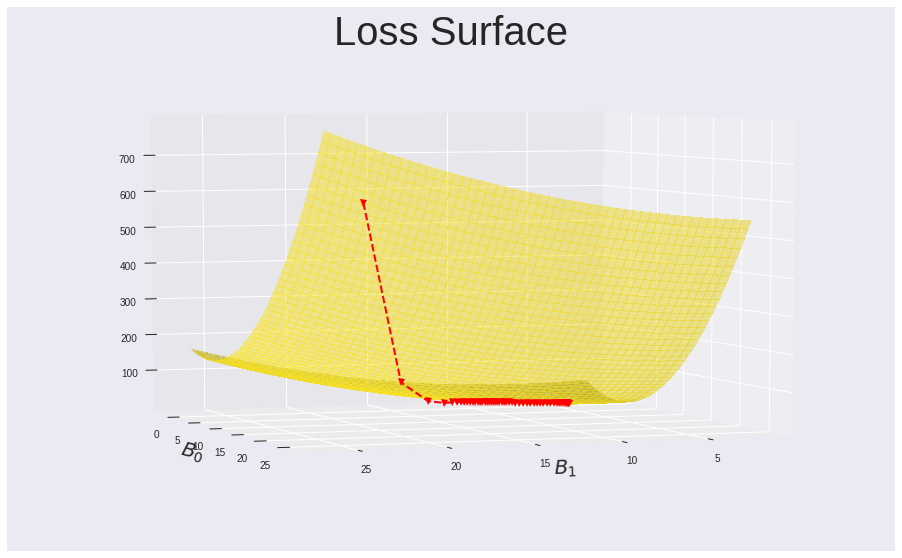

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm


short_weight = n_slice(weight , n )
short_beta   = n_slice(beta , n )
short_loss   = n_slice(loss_2 , n )

fig = plt.figure(figsize = (35,10))
ax = fig.add_subplot(1,2,1 , projection='3d')
ax.set_xlabel('$B_1$', size=20)
ax.set_ylabel('$B_0$', size=20)
ax.set_title("Loss Surface" , size = 40)
ax.plot(short_weight , short_beta , short_loss , c='red', marker='v' , linewidth = 2 , linestyle ="dashed")
ax.plot_surface(W2 , B2 , loss_ , linewidth=0, 
                antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(loss_))
ax.view_init(5,70)


## Loss Surface 3D 

### Rotation Animation

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


short_weight = n_slice(weight , n )
short_beta   = n_slice(beta , n )
short_loss   = n_slice(loss_2 , n )

fig = plt.figure(figsize = (15,10))
ax = Axes3D(fig)
ax.set_xlabel('$B_1$', size=20)
ax.set_ylabel('$B_0$', size=20)
ax.set_title("Loss Surface" , size = 40)
def init():
    # Plot the surface.
    ax.plot_surface(W2 , B2 , loss_ , linewidth=0, 
                antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(loss_))
    ax.plot(short_weight , short_beta , short_loss , c='red', marker='v' , linewidth = 2 , linestyle ="dashed" )
    return fig,
def animate(i):
    # azimuth angle : 0 deg to 360 deg
    ax.view_init(elev=10, azim=i*4)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=90, interval=100, blit=True)
#fn = 'rotate_azimuth_angle_3d_surf'
#ani.save(fn+'.mp4',writer='ffmpeg',fps=1000/50)
#ani.save(fn+'.gif',writer='imagemagick',fps=1000/50)
plt.rcParams['animation.html'] = 'html5'
plt.close()
ani

## Loss Surface 3D 

###  Animation

In [0]:

weight_slice = n_slice(weight , n )
bias_slice   = n_slice(beta , n )
loss_slice   = n_slice(loss_2 , n )

iteration_n = np.arange(1 , len(weight)).tolist()[::n] + [len(weight)]

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('$B_0$', size=20)
ax.set_ylabel('$B_1$', size=20)
ax.set_title('Stochastic Gradient Descent Updates', fontsize=30)
ax.plot_surface(W2 , B2 , loss_  , rstride=4, cstride=4, alpha=0.25)
def animate(i):
    graph.set_offsets([weight_slice[i], bias_slice[i]])
    graph.set_3d_properties([loss_slice[i]], zdir='z')

    line_data[0].append(weight_slice[i].flatten()[0])
    line_data[1].append(bias_slice[i].flatten()[0])
    line_data[2].append(loss_slice[i])

    lines.set_data(line_data[0], line_data[1])
    lines.set_3d_properties(line_data[2])
    
    text_box.set_text('Iteration: {}'.format(iteration_n[i]))

    return graph, lines, text_box

line_data = [[], [], []]
graph = ax.scatter([], [], [], s=100, c='red')
lines, = ax.plot([], [], [], c='red' , linewidth = 2 , linestyle = "dashed" , marker = "v")

text_box = ax.text(20.0, 20.0, 500.0, 'Iteration 0', size = 16)

anim = animation.FuncAnimation(fig, animate, len(loss_slice), interval=100, blit=True)
# anim.save('animation.mp4', writer='avconv', fps=2, codec="libx264")

plt.rcParams['animation.html'] = 'html5'
plt.close()
anim

## Contour Animation 3D

Text(0, 0.5, 'Intercept')

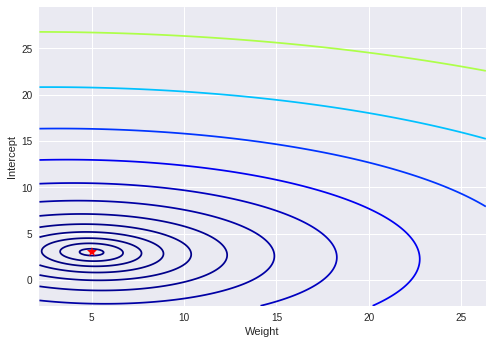

In [0]:
fig1, ax1 = plt.subplots()

ax1.contour(W2, B2, loss_, levels=np.logspace(-3, 3, 25), cmap='jet')
#Plot target (the minimum of the function)
min_point = np.array([5., 3.])
min_point_ = min_point[:, np.newaxis]
ax1.plot(*min_point_ , 'r*', markersize=10)
ax1.set_xlabel(r'Weight')
ax1.set_ylabel(r'Intercept')

In [0]:
''' Animation '''
""" URL : https://jed-ai.github.io/py1_gd_animation/ """
# Create animation
line, = ax1.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)
point, = ax1.plot([], [], 'bo')
value_display = ax1.text(0.02, 0.02, '', transform=ax1.transAxes)

weight_slice = n_slice(weight , n )
bias_slice   = n_slice(beta , n )
loss_slice   = n_slice(loss_2 , n )


def init():
    line.set_data([], [])
    point.set_data([], [])
    value_display.set_text('')

    return line, point, value_display

def animate(i):
    # Animate line
    line.set_data(weight_slice[:i], bias_slice[:i])
    
    # Animate points
    point.set_data(weight_slice[i], bias_slice[i])

    # Animate value display
    value_display.set_text('Min = ' + str(loss_slice[i]))

    return line, point, value_display

ax1.legend(loc = 1)

anim = animation.FuncAnimation(fig1, animate, init_func=init,
                               frames=len(weight_slice),
                               interval=120, 
                               repeat_delay=60, blit=True)

plt.rcParams['animation.html'] = 'html5'
anim

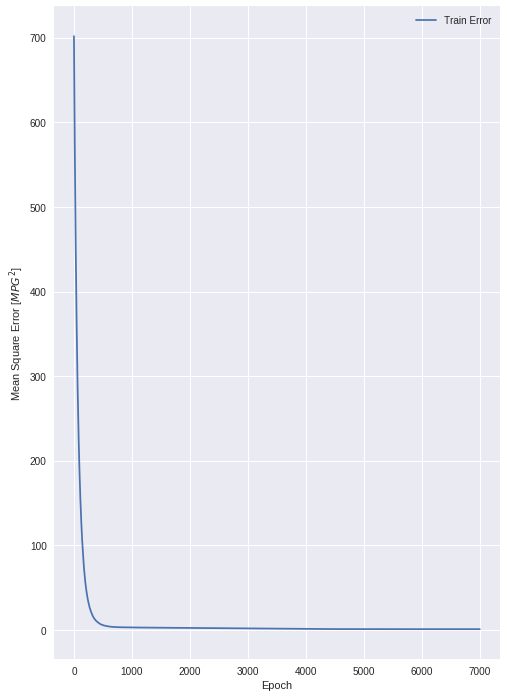

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure(figsize=(8,12))
  
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
               label='Train Error')
    plt.legend()
    plt.show()

plot_history(history)